<a href="https://colab.research.google.com/github/Tapishi/Knowledge-Distillation/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:

The three different recommendation models that you are training and evaluating.

The hyperparameters that you are using to train the models.

The results of the evaluation on the test set.

Your plans for future work, such as trying different hyperparameters or evaluating the models on a different dataset.

In [ ]:
!mkdir -p /bin/my_project
%cd /bin/my_project



/usr/bin/my_project


In [ ]:
! git clone https://github.com/SeongKu-Kang/Topology_Distillation_KDD21.git

fatal: destination path 'Topology_Distillation_KDD21' already exists and is not an empty directory.


In [ ]:
%cd /bin/my_project/Topology_Distillation_KDD21

/usr/bin/my_project/Topology_Distillation_KDD21


In [ ]:
!pwd

/usr/bin/my_project


In [ ]:
from model import Base_model, FTD, HTD

from utils import train_dataset, test_dataset, evaluate, print_result, read_settings
from run import run_base, run_FTD, run_HTD
from copy import deepcopy
import time

import torch
import torch.utils.data as data
import torch.optim as optim

import random
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

# Setup
## gpu setting
gpu = torch.device('cuda:0')

## Hyperparameters for Training
lr, batch_size = 0.001, 1024
reg = 0.001

## Load dataset
user_num, item_num = 5220, 25182

train_R, train_interactions, valid_R, test_R = read_settings()
train_dataset = train_dataset(user_num, item_num, train_R, train_interactions)
test_dataset = test_dataset(user_num, item_num, valid_R, test_R)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

run_dict = {'train_loader':train_loader, 'test_dataset':test_dataset, 'lr':lr, 'reg':reg, 'gpu':gpu, \
            'max_epoch': 100, 'eval_period':10, 'lmbda_TD': 0.001, 'alpha':0.5}

In [ ]:
Teacher = Base_model(user_num, item_num, dim=200, gpu=gpu).to(gpu)
Teacher_history = run_base(run_dict, Teacher)

Train Done!, Recall@50: 0.3129


In [ ]:
history_dict = {}
Teacher_user_emb, Teacher_item_emb = Teacher.get_embedding()

for student_dim in [10, 20, 100, 200]:

    history_dict[student_dim] = []

    # Student
    model = Base_model(user_num, item_num, dim=student_dim, gpu=gpu).to(gpu)
    Student_history = run_base(run_dict, model)
    history_dict[student_dim].append(Student_history[:])

    # FTD
    model = FTD(user_num, item_num, Teacher_user_emb, Teacher_item_emb, gpu=gpu, student_dim=student_dim).to(gpu)
    FTD_history = run_FTD(run_dict, model)
    history_dict[student_dim].append(FTD_history[:])

    # HTD
    model = HTD(user_num, item_num, Teacher_user_emb, Teacher_item_emb, gpu=gpu, student_dim=student_dim, K=30, choice='second').to(gpu)
    HTD_history = run_HTD(run_dict, model)
    history_dict[student_dim].append(HTD_history[:])

Train Done!, Recall@50: 0.3206


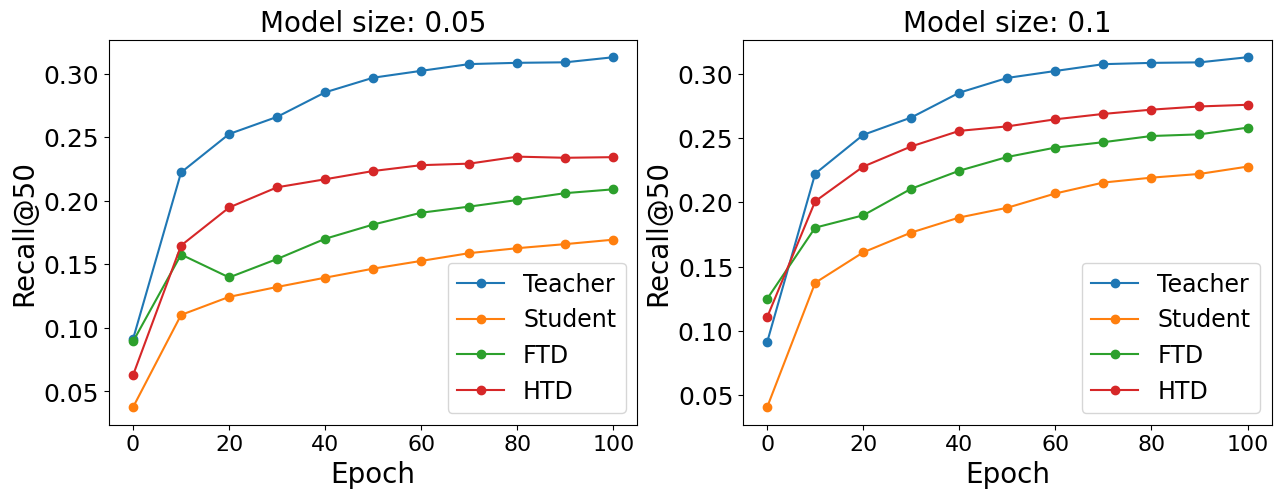

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for idx, student_dim in enumerate([10, 20]):

    axes[idx].plot([i for i in range(0, 101, 10)], Teacher_history, label='Teacher',  marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][0], label='Student', marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][1], label='FTD', marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][2], label='HTD', marker='o')

    axes[idx].legend(loc=4, fontsize=17)
    axes[idx].tick_params(axis="x", labelsize=15.9)
    axes[idx].tick_params(axis="y", labelsize=18)
    axes[idx].set_title('Model size: ' + str(student_dim / 200), fontsize=20)
    axes[idx].set_xlabel('Epoch', fontsize=20)
    axes[idx].set_ylabel('Recall@50', fontsize=20)


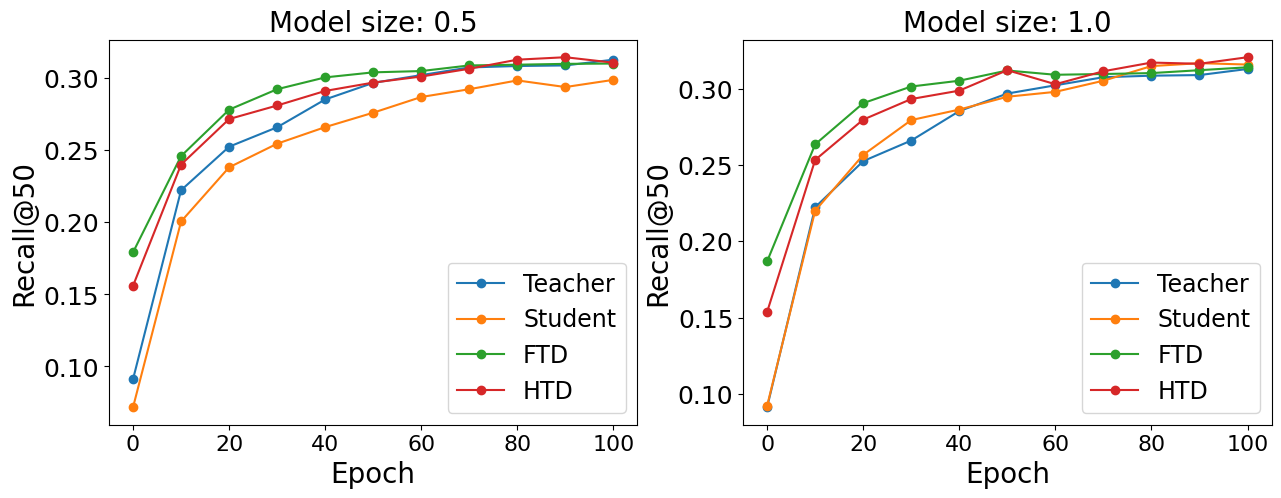

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for idx, student_dim in enumerate([100, 200]):

    axes[idx].plot([i for i in range(0, 101, 10)], Teacher_history, label='Teacher',  marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][0], label='Student', marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][1], label='FTD', marker='o')
    axes[idx].plot([i for i in range(0, 101, 10)], history_dict[student_dim][2], label='HTD', marker='o')

    axes[idx].legend(loc=4, fontsize=17)
    axes[idx].tick_params(axis="x", labelsize=15.9)
    axes[idx].tick_params(axis="y", labelsize=18)
    axes[idx].set_title('Model size: ' + str(student_dim / 200), fontsize=20)
    axes[idx].set_xlabel('Epoch', fontsize=20)
    axes[idx].set_ylabel('Recall@50', fontsize=20)

In [ ]:
experiment = {}
Teacher_user_emb, Teacher_item_emb = Teacher.get_embedding()

for student_dim in [20, 40, 60,80,100]:

    experiment[student_dim] = []

    # Student
    model = Base_model(user_num, item_num, dim=student_dim, gpu=gpu).to(gpu)
    Student_history = run_base(run_dict, model)
    experiment[student_dim].append(Student_history[:])

    # FTD
    model = FTD(user_num, item_num, Teacher_user_emb, Teacher_item_emb, gpu=gpu, student_dim=student_dim).to(gpu)
    FTD_history = run_FTD(run_dict, model)
    experiment[student_dim].append(FTD_history[:])

    # HTD
    model = HTD(user_num, item_num, Teacher_user_emb, Teacher_item_emb, gpu=gpu, student_dim=student_dim, K=30, choice='second').to(gpu)
    HTD_history = run_HTD(run_dict, model)
    experiment[student_dim].append(HTD_history[:])

'Epoch [80/100], Recall@50: 0.3004'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Create a figure with two rows and three columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

student_dims =[20, 40, 60,80,100]

for idx, student_dim in enumerate(student_dims):
    row, col = divmod(idx, 3)  # Calculate the row and column indices

    axes[row, col].plot([i for i in range(0, 101, 10)], Teacher_history, label='Teacher', marker='o')
    axes[row, col].plot([i for i in range(0, 101, 10)], history_dict[student_dim][0], label='Student', marker='o')
    axes[row, col].plot([i for i in range(0, 101, 10)], history_dict[student_dim][1], label='FTD', marker='o')
    axes[row, col].plot([i for i in range(0, 101, 10)], history_dict[student_dim][2], label='HTD', marker='o')

    axes[row, col].legend(loc=4, fontsize=17)
    axes[row, col].tick_params(axis="x", labelsize=15.9)
    axes[row, col].tick_params(axis="y", labelsize=18)
    axes[row, col].set_title('Model size: ' + str(student_dim / 200), fontsize=20)
    axes[row, col].set_xlabel('Epoch', fontsize=20)
    axes[row, col].set_ylabel('Recall@50', fontsize=20)

plt.tight_layout()  # Ensure the subplots don't overlap
plt.show()
